In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *

In [2]:
def finite_difference( fun, x, stepsize = 0.01, dimension = 0 ):
    step = np.array([0.0, 0.0, 0.0])
    step[dimension] = stepsize
    return (fun(x+step)-fun(x-step))/(2.0*stepsize)
    

class RBF(object):
    def __init__(self, stddev, amplitude=1.0 ):
        self.amplitude = amplitude
        self.stddev = stddev
        self.variance = stddev*stddev
        self.normalization = 1.0/(np.power(stddev, 3.0)*np.power(2.0*np.pi, 1.5))
    def __call__(self, x):
        #return self.normalization*np.exp(-(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])/self.variance)
        return self.normalization*np.exp(-(x[0]*x[0]+x[1]*x[1])/self.variance)
    def dx(self, x):
        return -self(x)*2.0/(self.variance)*x[0]
    def dxdx(self, x):
        c = 2.0/self.variance
        return self(x)*(c*c*x[0]*x[0] - c)
    def dxdy(self, x):
        c = 2.0/self.variance
        return self(x)*c*c*x[0]*x[1]
    def dy(self, x):
        return -self(x)*2.0/(self.variance)*x[1]
    def dydx(self, x):
        return self.dxdy(x)
    def dydy(self, x):
        c = 2.0/self.variance
        return self(x)*(c*c*x[1]*x[1] - c)
    def dz(self, x):
        # NB: this is for our pseudo-2d case
        # return -self(x)*2.0/(self.stddev*self.stddev)*x[0]
        return 0.0

class Derivative(object):
    def __init__(self, fun, dimension = 0, stepsize = 0.01):
        self.fun = fun
        self.step = np.zeros(3)
        self.step[dimension] = stepsize
        self.stepsize = stepsize
    def __call__(self, x):
        return (self.fun( x+self.step )-self.fun( x-self.step ))/(2.0*self.stepsize)
    
        
    
    
def plot_function( fun, start, end, numSamples, marker=" ", linestyle="-" ):
    x_list = np.zeros(numSamples)
    y_list = np.zeros(numSamples)
    
    direction = end-start
    distance = np.linalg.norm(end-start)
    direction = direction/distance
    dx = distance/numSamples
    
    for i in range(numSamples):
        x = i*dx
        pWS = start + direction*x
        y = fun(pWS)
        x_list[i] = x
        y_list[i] = y
    plt.plot(x_list, y_list, marker=marker, linestyle=linestyle)
        
        
        
        

    
rbf = RBF(.4)



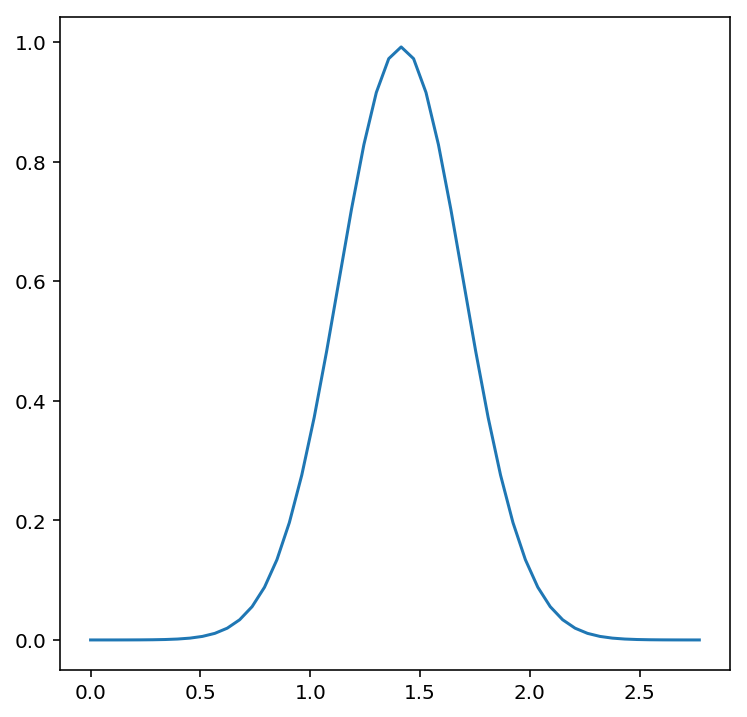

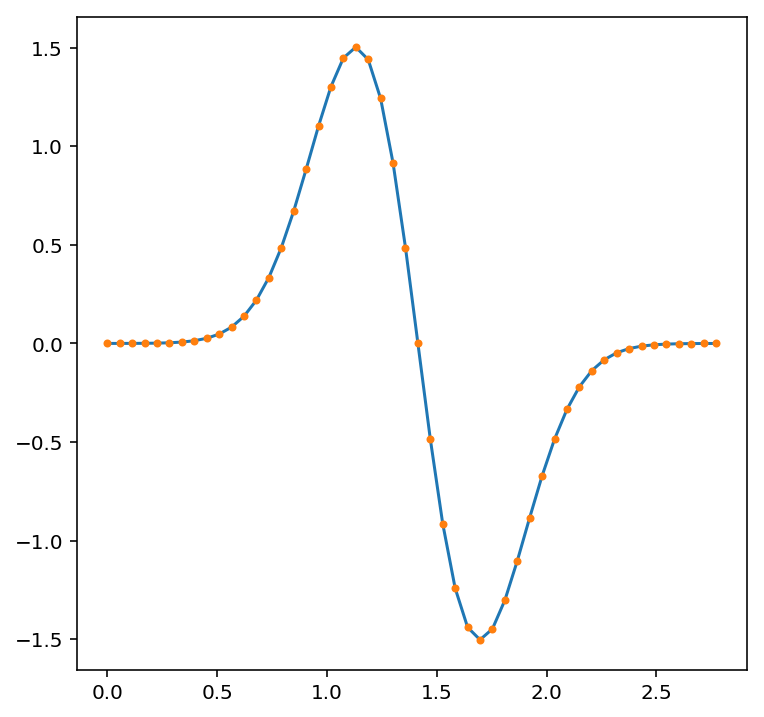

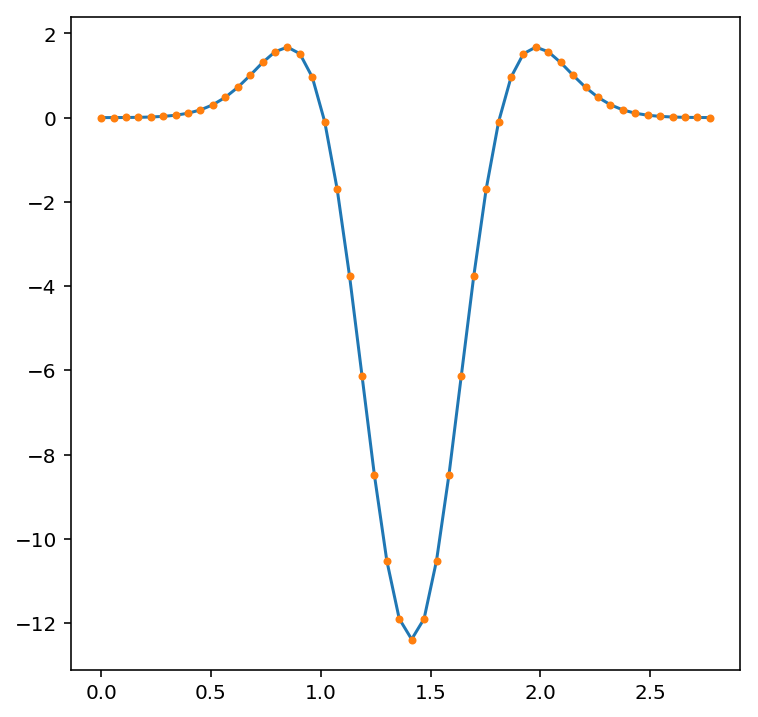

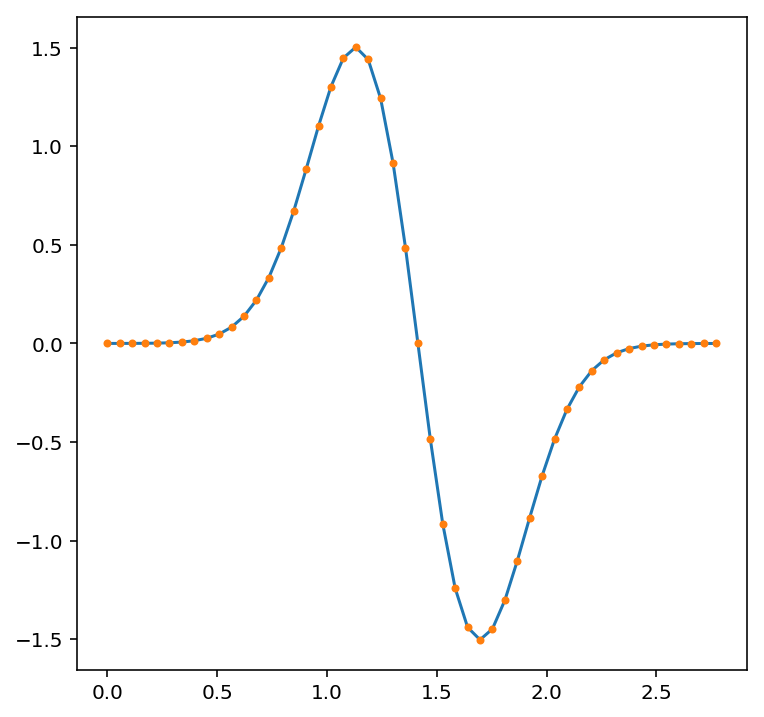

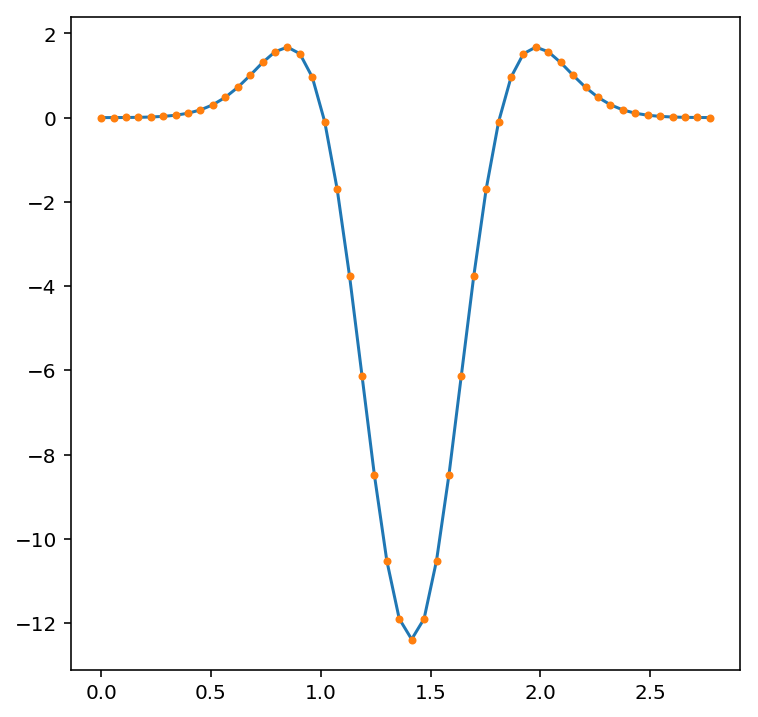

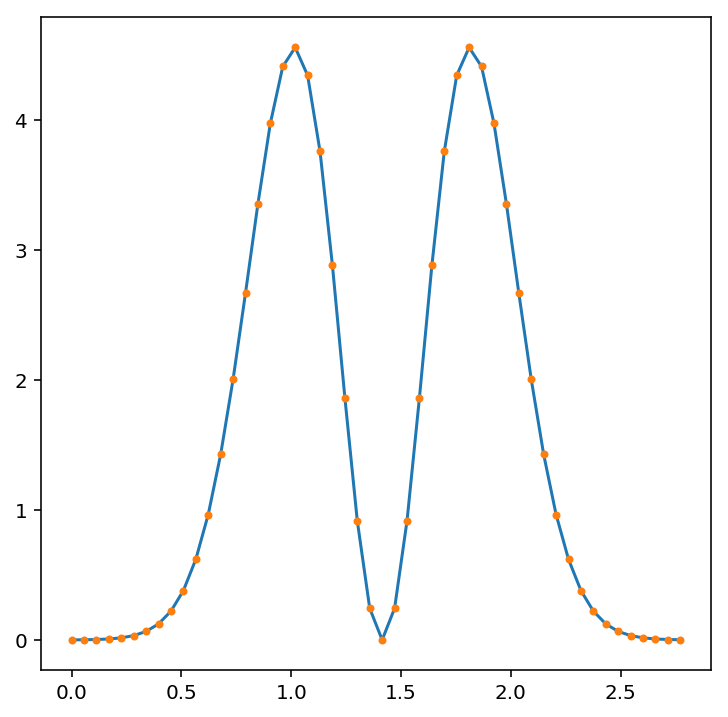

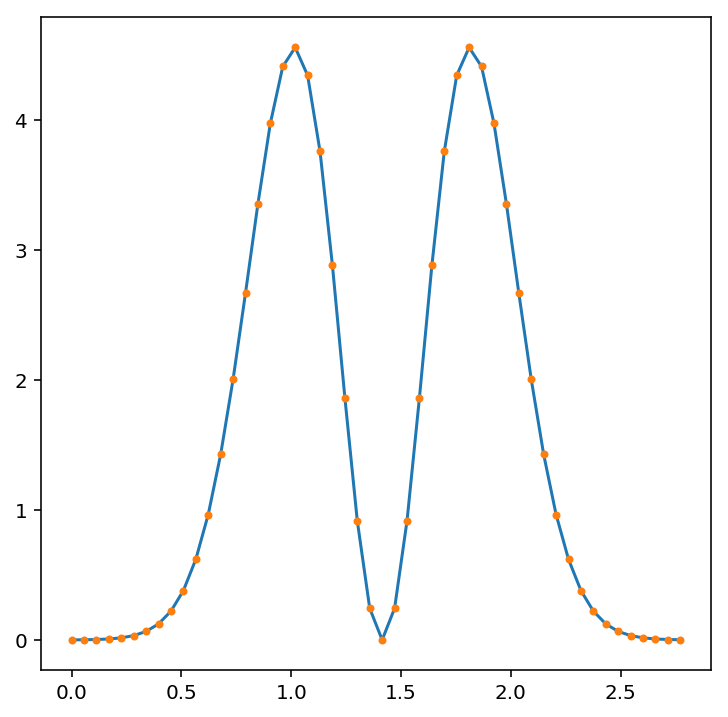

In [135]:
#start = np.array([-1.0, 0.0, 0.0])
#end = np.array([1.0, 0.0, 0.0])

start = np.array([-1.0, -1.0, 0.0])
end = np.array([1.0, 1.0, 0.0])


fig = plt.figure(figsize=(6, 6))
plot_function(rbf, start, end, 50)
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(rbf, 0), start, end, 50)
plot_function(rbf.dx, start, end, 50, marker='.', linestyle=" ")
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(Derivative(rbf, 0), 0), start, end, 50)
plot_function(rbf.dxdx, start, end, 50, marker='.', linestyle=" ")
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(rbf, 1), start, end, 50)
plot_function(rbf.dy, start, end, 50, marker='.', linestyle=" ")
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(Derivative(rbf, 1), 1), start, end, 50)
plot_function(rbf.dydy, start, end, 50, marker='.', linestyle=" ")
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(Derivative(rbf, 0), 1), start, end, 50)
plot_function(rbf.dydx, start, end, 50, marker='.', linestyle=" ")
plt.show()

fig = plt.figure(figsize=(6, 6))
plot_function(Derivative(Derivative(rbf, 1), 0), start, end, 50)
plot_function(rbf.dxdy, start, end, 50, marker='.', linestyle=" ")
plt.show()

